## Exploratory Data Analysis  
---
This notebook contains some initial exploration of the data we collected from yelp. 

In [1]:
# imports:
import requests
import pandas as pd
import numpy as np
import time
import pprint as pp
from tqdm import tqdm
import time
import psutil
import sys
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [6]:
# Configure libraries
# Use seaborn to make plots look nicer
sns.set_context('talk')
sns.set(style="white")#, font_scale=2)

# Don't display too many rows of DataFrames
pd.options.display.max_rows = 28
pd.options.display.max_columns = 30

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

In [8]:
# Read in 'result.csv' ('result.csv' is an example of the output of our Data Ingestion pipeline)
df = pd.read_csv('result.csv')
df

,Unnamed: 0,Name,URL,Phone,Latitude,Longitude,Address,City,State,ZIP,Vertical,Rating,Review Count,Yelp ID,Review1,Review2,Review3,Vertical1,Vertical2,Vertical3,Reviews,polarity,subjectivity,Word1,Word2,Word3,Word4,Word5
0,0,Cucina Basilico,https://www.yelp.com/biz/cucina-basilico-san-d...,1.86e+10,32.81,-117.12,3755 Murphy Canyon Rd,San Diego,CA,92123,Italian,4.5,574,AlO78to1upUkVhRx12XtVA,"During this ""stay at home"" order, we've been o...",My friends and I decided to go in for dinner l...,AMAZING Homemade Italian Food!\n\nI come here ...,Italian,None,None,during this stay at home order weve been order...,0.24,0.39,week,grab,italian,restaurant,decided
1,1,Buon Appetito,https://www.yelp.com/biz/buon-appetito-san-die...,1.62e+10,32.72,-117.17,1609 India St,San Diego,CA,92101,Italian,4.0,2291,7PGyWA51sSdw8M4fBXa9Gw,"Due to the whole pandemic, we decided to try a...",Delicious pasta and amazing service. Highly re...,Buon Appetito is a cozy little place in Little...,Italian,None,None,due to the whole pandemic we decided to try a ...,0.08,0.47,cozy,place,little,appetito,di
2,2,Buona Forchetta,https://www.yelp.com/biz/buona-forchetta-san-d...,1.62e+10,32.72,-117.13,3001 Beech St,San Diego,CA,92102,"Pizza, Italian",4.5,2420,n3sKOKoEk_gKhBvgfIwZaA,"LOCKDOWN HOURS:\nMon-Thurs 12-3pm, 4-8:30pm\nS...",Covid pandemic take out option with buono was ...,Enjoyed a lovely pandemic take-out meal on a F...,Pizza,Italian,None,lockdown hoursmonthurs sat closes at sun clos...,0.31,0.52,close,pizza,meal,pandemic,option
3,3,Pesto Italian Craft Kitchen,https://www.yelp.com/biz/pesto-italian-craft-k...,1.62e+10,32.76,-117.07,6011 El Cajon Blvd,San Diego,CA,92115,"Pizza, Italian",4.5,1218,4GT1sQ_pcKk4gBMrJddexw,Omg... the meatball covid special is worth it!...,"The best Italian food, pizza in College area. ...",Huge shout out to the team at Pesto Italian Cr...,Pizza,Italian,None,omg the meatball covid special is worth ittoo ...,0.40,0.41,delivery,food,italian,area,meatball
4,4,Filippi's Pizza Grotto Little Italy,https://www.yelp.com/biz/filippis-pizza-grotto...,1.62e+10,32.72,-117.17,1747 India St,San Diego,CA,92101,"Italian, Pizza, Bars",4.0,2822,PzGU5brzhsVqumdU4qE5Rw,"Been here so many times, time for a local revi...",I'm not a pizza person but when my husband ask...,Came here to shop during the pandemic in the m...,Italian,Pizza,Bars,been here so many times time for a local revie...,0.12,0.31,pizza,marinara,time,person,light
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,195,Amici's Ristobar,https://www.yelp.com/biz/amicis-ristobar-san-d...,1.86e+10,32.96,-117.19,5980 Village Way,San Diego,CA,92130,"Italian, Pizza, Wine Bars",3.5,239,hNLPZGTZ8gAty64ZBFRFrA,Nice restaurant.. good drinks and good food! C...,Went here last night for Valentine's day. The...,My wife and I celebrated the 14th anniversary ...,Italian,Pizza,Wine Bars,nice restaurant good drinks and good food came...,0.26,0.44,good,year,night,original,went
195,196,Mamma Rosa's Restaurant & Pizza,https://www.yelp.com/biz/mamma-rosas-restauran...,1.62e+10,32.81,-116.92,1773 E Main St,El Cajon,CA,92021,"Pizza, Italian",4.5,222,uIbzpdygSEdl-jiteakZTw,Excellent food and very nice friendly waitress...,What is it about greatt food and atmosphere at...,Very tasty but pricey . Dinner for 4 takeout w...,Pizza,Italian,None,excellent food and very nice friendly waitress...,0.38,0.48,local,food,dinner,portion,great
196,197,The Rose,https://www.yelp.com/biz/the-rose-san-diego?ad...,1.62e+10,32.73,-117.13,2219 30th St,San Diego,CA,92104,"Wine Bars, American (New), Breakfast & Brunch",4.5,253,4jLPsl5gJpusHFp1KqEDCQ,The Rose is an absolute gem and located in Sou...,Lived around here for years but never tried th...,Not really a Wine-O but the selection and staf...,Wine Bars,American (New),Breakfast & Brunch,the rose is an absolute gem and located in sou...,0.32,0.68,wine,rose,really,selection,place
197,198,STACKED Food Well Built - San

In [ ]:
# Looks like only two missing entries in the table
df.isnull().sum()[:10]

In [4]:
# some cleaning: 
df['Phone'] = df['Phone'].apply(lambda x: x if pd.isnull(x) else str(int(x)))
df['ZIP'] = df['ZIP'].apply(lambda x: x if pd.isnull(x) else str(int(x)))
df['Rating'] = df['Rating'].astype(int)

df.head()

NameError: name 'df' is not defined

In [5]:
df.describe()

NameError: name 'df' is not defined

In [70]:
# number of area codes represented in this dataset:

print(len(df.ZIP.unique()))
df.ZIP.unique()

48


array(['92123', '92101', '92102', '92115', '92111', '92106', '92108',
       '92103', '92122', '92110', '92104', '92107', '92121', '92131',
       '91945', '92113', '92129', '92037', '92119', '92109', '91942',
       '92124', '92105', '92117', '91910', '92120', '92127', '92116',
       '92118', '92130', '92128', '92019', '92126', '92021', '92064',
       '92007', '92014', '92139', '92040', '91950', '92020', '91977',
       '91941', '92114', '92071', '91901', '92024', '91914'], dtype=object)

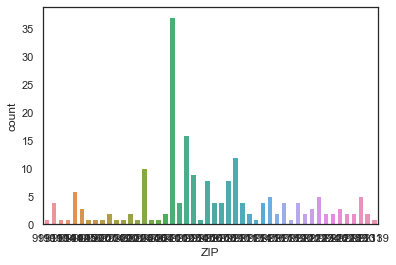

In [71]:
unique_zips = df.ZIP.value_counts().reset_index()
unique_zips.columns = ['ZIP','count']
sns.barplot(x='ZIP', y='count', data=unique_zips)

Unique Ratings:  [4 5 3]


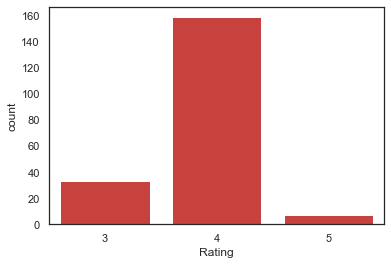

In [80]:
# ratings

sns.countplot(df.Rating, color='#DE2D26').set(ylabel='count')
print('Unique Ratings: ', df.Rating.unique())